# Matematyczne podstawy modelowania komputerowego

Jakub Spiechowicz

Wyklad 07, Interpolacja

# Aproksymacja

Aproksymacja to proces okreslania rozwiazan przyblizonych na podstawie rozwiazan znanych, ktore sa bliskie rozwiazaniom dokladnym w z gory okreslonym sensie.

Jej szczegolnym przypadkiem jest interpolacja, a wiec proces wyznaczania w danym przedziale funkcji interpolacyjnej, ktora przyjmuje w nim z gory zadane wartosci w ustalonych punktach nazywanych wezlami.

# Interpolacja wielomianowa

Rozwiazemy nastepujace zadanie: znalezc wielomian $p$ mozliwie najnizszego stopnia taki, ze dla $n+1$ punktow $(x_i, y_i)$ jest 

$$ p(x_i) = y_i \quad 0 \leq i \leq n$$

Mowimy, ze ten wielomian interpoluje wartosci $y_i$ w wezlach $x_i$. 

Proces poszukiwania takiego wielomianiu $p(x)$ nazywamy interpolacja wielomianowa, a w ogolnosci funkcji $f(x)$ interpolacja.

Zastosowania interpolacji:

* w ogolnosci przejscie z danych dyskretnych na ciagle
* w szczegolnosci algorytmy kompresji

# Interpolacja liniowa

Najprostszym wariantem interpolacji wielomianowej jest interpolacja liniowa. Majac dwa punkty $(x_0, y_0)$ oraz $(x_1, y_1)$ mozemy wyznaczyc funkcje liniowa $p(x) = a_1 x + a_0$, ktora przechodzi przez te dwa punkty $p(x_0) = y_0$ oraz $p(x_1) = y_1$, tzn. $a_1 = \frac{y_1 - y_0}{x_1 - x_0}$ i $a_0 = y_1 - a_1x_1$ skad

\begin{align}
p(x) &= a_1x + a_0 = \frac{y_1 - y_0}{x_1 - x_0} x + y_1 - \frac{y_1 - y_0}{x_1 - x_0} x_1 \\ &= \left( \frac{x - x_1}{x_0 - x_1} \right) y_0 + \left( \frac{x - x_0}{x_1 - x_0} \right ) y_1
\end{align}

Przyklad

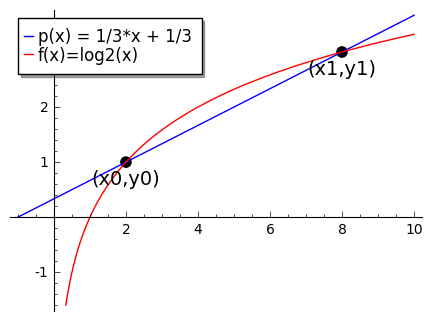

In [13]:
x0 = 2; y0 = 1
x1 = 8; y1 = 3
p(x)=(((x-x1)/(x0-x1)))*y0+(((x-x0)/(x1-x0)))*y1
pl=plot(p(x), (x,-1,10), legend_label = "p(x) = "+str(p(x)))
pl+=list_plot([(x0,p(x0)),(x1,p(x1))], color = 'black', size = 70)
pl+=text( '(x0,y0)', ( x0, p(x0)-0.3 ), fontsize = 14, color = 'black')
pl+=text( '(x1,y1)', ( x1, p(x1)-0.3 ), fontsize = 14, color = 'black')
pl+=plot(log(x,2), (x,0.33,10), legend_label = "f(x)=log2(x)", color='red')
show(pl,figsize=4.5)

Zwrocmy uwage na dwa fakty:

* Blad interpolacji jest niewielki w poblizu wezlow $x_i$
* Interpolacja liniowa jest dokladna wylacznie w przypadku funkcji liniowej.

# Interpolacja kwadratowa

Majac trzy punkty $(x_0, y_0)$, $(x_1, y_1)$ oraz $(x_2, y_2)$ mozemy znalezc funkcje kwadratowa $p(x) = a_2x^2 + a_1x + a_0$, ktora przechodzi przez te punkty. W tym celu nalezy rozwiazac uklad rownan

\begin{align}
    a_2x_0^2 + a_1x_0 + a_0 &= y_0\\
    a_2x_1^2 + a_1x_1 + a_0 &= y_1\\
    a_2x_2^2 + a_1x_2 + a_0 &= y_2
\end{align}

Wezmy np. punkty $(2,1)$, $(4,2)$ oraz $(8,3)$.

# Zadanie

Rozwiazac powyzszy uklad rownan dla punktow $(2,1)$, $(4,2)$ oraz $(8,3)$.

Przyklad

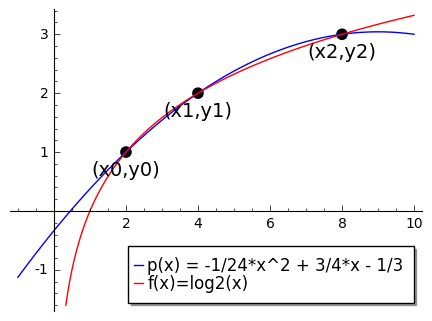

In [17]:
x0=2;y0=1
x1=4;y1=2
x2=8;y2=3
p(x)=-1/24*x^2 + 3/4*x - 1/3
pl=plot(p(x), (x,-1,10), legend_label = "p(x) = "+str(p(x)))
pl+=list_plot([(x0,p(x0)),(x1,p(x1)),(x2,p(x2))], color = 'black', size = 70)
pl+=text( '(x0,y0)', ( x0, p(x0)-0.3 ), fontsize = 14, color = 'black')
pl+=text( '(x1,y1)', ( x1, p(x1)-0.3 ), fontsize = 14, color = 'black')
pl+=text( '(x2,y2)', ( x2, p(x2)-0.3 ), fontsize = 14, color = 'black')
pl+=plot(log(x,2), (x,0.33,10), legend_label = "f(x)=log2(x)", color='red')
show(pl,figsize=4.5)

# Interpolacja Lagrange'a

Majac $n+1$ punktow $(x_i,y_i)$ chcemy znalezc wielomian postaci $p(x) = a_nx^n + a_{n-1}x^{n-1} + ... + a_1x_1 + a_0$ dla ktorego mamy $p(x_0) = y_0, p(x_1) = y_1, ..., p(x_{n+1}) = y_{n+1}$. Wyrazamy go jako

$$ p(x) = \sum_{k=0}^{n} y_k l_k(x) $$

gdzie $l_k$ sa wielomianami zaleznymi od wezlow $x_0$, $x_1$, ..., $x_n$, ale nie od wartosci $y_0$, $y_1$, ..., $y_n$.

Jesli dla ustalonego $y_i = 1$, a pozostale znikaja to mamy

$$ \delta_{ij} = p_n(x_j) = \sum_{k=0}^n y_k l_k(x_j) = \sum_{k=0}^n \delta_{ik}l_k(x_j) = l_i(x_j) \quad 0 \leq j \leq n. $$

Latwo znalezc taki wielomian $l_i$. Mianowicie jego pierwiastkami sa wszystkie wezly oprocz $x_i$ czyli dla pewnego $c$

$$ l_i(x) = c(x - x_0)...(x - x_{i-1})(x - x_{i+1})...(x - x_n) $$

przy czym $l_i(x_i) = 1$, wiec

$$ l_i(x) = \prod_{j = 0, \, j \neq i}^{n} \frac{x - x_j}{x_i - x_j} \quad 0 \leq i \leq n. $$

Wzor interpolacyjny Lagrange'a

$$ p(x) = \sum_{k=0}^{n} y_k l_k(x), \quad l_k(x) = \prod_{j = 0, \, j \neq k}^{n} \frac{x - x_j}{x_k - x_j} \quad 0 \leq k \leq n. $$

# Zadanie

Zaimplementowac wzor interpolacyjny Lagrange'a oraz przetestowac jego dzialanie dla punktow $(5,1)$, $(-7,-23)$, $(-6,-54)$ oraz $(0,-954)$. Porownac otrzymany wynik z procedura Sagemath Lagrange_polynomial().

Twierdzenie

Jezeli wezly interpolacji $x_0$, $x_1$, ..., $x_n$ sa parami rozne to istnieje dokladnie jeden wielomian $p$ stopnia $n$ taki, ze

$$ p_n(x_i) = y_i \quad 0 \leq i \leq n. $$

Dowod przez indukcje:

* Dla $n = 0$ mamy wielomian staly $p_0(x) = y_0$.
* Zalozmy, ze dla pewnego $k$ istnieje wielomian interpolujacy stopnia co najwyzej $k-1$. $p_k$ mozemy wyrazic nastepujaco

$$ p_{k}(x) = p_{k-1}(x) + c(x - x_0)(x - x_1)...(x - x_{k-1}) $$

Stopien tego wielomianu nie przewyzsza $k$.

$p_k$ z zalozenia spelnia warunki interpolacyjne dla $0 \leq i \leq k-1$. Stala c wyznaczymy z warunku $p_k(x_k) = y_k$ zatem

$$ c = \frac{y_k - p_{k-1}(x_k)}{(x_k - x_0)(x_k - x_1)...(x_k - x_{k-1})}. $$

# Interpolacja Newtona

Powyzszy dowod zawiera metode konstrukcji innej postaci wielomianu interpolacyjnego. Wielomiany $p_1$, $p_2$, ..., $p_n$ powstaja z poprzedniego poprzez dodanie jednego skladnika:

$$p_k(x) = c_0 + c_1(x - x_0) +...+ c_k(x-x_0)(x - x_1)...(x - x_{k-1}).$$

W bardziej zwartej formie
$$p_k(x) = \sum_{i=0}^{k} c_i \prod_{j=0}^{i-1} (x - x_j),$$
gdzie
$$c_i = \frac{y_i - p_{i-1}(x_i)}{(x_i - x_0)(x_i - x_1)...(x_i - x_{i-1})}.$$

Przewaga metody Newtona nad metoda Lagrange'a polega na tym, ze w tej ostatnej dodajac jeden wezel do zbioru punktow musimy wyznaczac caly wielomian interpolacyjny od nowa. W metodzie Newtona mozemy latwo znalezc interpolacje w oparciu o wczesniej znany wielomian.

# Ilorazy roznicowe

Wiemy, ze dla danej funkcji $f$ wielomian spelniajacy warunki interpolacyjne

$$ p(x_i) = f(x_i), \quad 0 \leq i \leq n, $$

dla parami roznych wezlow mozemy wyrazic przy pomocy wzoru Newtona

$$ p(x) = \sum_{k=0}^n c_k q_k(x), \quad q_k(x) = \prod_{j=0}^{k-1}(x - x_j). $$

Wspolczynniki $c_k$ wyznaczamy z warunkow $p(x_0) = y_0 = f(x_0)$, $p(x_1) = y_1 = f(x_1)$, ..., $p(x_n) = y_n = f(x_n)$. W szczegolnosci

\begin{align}
    c_0 &= f(x_0)\\
    c_0 + c_1(x_1 - x_0) &= f(x_1)\\
    c_0 + c_1(x_1 - x_0) + c_2(x_2 - x_0)(x_2 - x_1) &= f(x_2)\\
    &...
\end{align}

Skad 

\begin{align}
    c_0 &= f(x_0)\\
    c_1 &= \frac{f(x_1) - c_0}{x_1 - x_0} = \frac{f(x_1) - f(x_0)}{x_1 - x_0}\\
    c_2 &= \frac{\frac{f(x_2) - f(x_1)}{x_2 - x_1} - \frac{f(x_1) - f(x_0)}{x_1 - x_0}}{x_2 - x_0}\\
    &...
\end{align}

Oznaczmy $c_0 = f[x_0]$, $c_1 = f[x_0,x_1]$, $c_2 = f[x_0,x_1,x_2]$, ..., $c_n = f[x_0,x_1,...,x_n]$, gdzie 

$$f[x_0,x_1,...,x_k]$$ 

nazwiemy ilorazem roznicowym rzedu $k$. Wtedy

\begin{align}
    c_0 &= f[x_0] = f(x_0)\\
    c_1 &= f[x_0,x_1] = \frac{f(x_1) - c_0}{x_1 - x_0} = \frac{f(x_1) - f(x_0)}{x_1 - x_0} = \frac{f[x_1] - f[x_2]}{x_1-x_0}\\
    c_2 &= f[x_0,x_1,x_2] = \frac{\frac{f(x_2) - f(x_1)}{x_2 - x_1} - \frac{f(x_1) - f(x_0)}{x_1 - x_0}}{x_2 - x_0} = \frac{f[x_1,x_2] - f[x_0,x_1]}{x_2 - x_0}\\
    &...
\end{align}

Zatem ilorazy roznicowe zerowego i pierwszego rzedu sa nastepujace

$$ f[x_0] = f(x_0), \quad f[x_0,x_1] = \frac{f(x_1) - f(x_0)}{x_1 - x_0}, $$

a dalsze spelniaja zaleznosc

$$ f[x_0, x_1, ..., x_k] = \frac{f[x_1,x_2,...,x_k] - f[x_0,x_1,...,x_{k-1}]}{x_k - x_0}. $$

Znajac wezly $x_i$ oraz wartosci funkcji $f(x_i)$ czyli ilorazy $f[x_i]$ zerowego rzedu mozna z pomoca tego wzoru wyznaczyc tablice ilorazow roznicowych wyzszych rzedow potrzebnych we wzorze Newtona.

Pamietajac, ze $c_k = f[x_0, x_1, ..., x_k]$ mozemy wzor Newtona przepisac w postaci

$$ p(x) = \sum_{k=0}^n f[x_0,x_1,...,x_k] q_k(x), \quad q_k(x) = \prod_{j=0}^{k-1}(x - x_j). $$

Przyklad dla trzech wezlow

\begin{align}
&x_0 \quad f[x_0] \quad f[x_0,x_1] \quad f[x_0,x_1,x_2]\\
&x_1 \quad f[x_1] \quad f[x_1,x_2]\\
&x_2 \quad f[x_2]
\end{align}

Tablica jest trojkatna. Pierwszy wiersz zawiera te ilorazy, ktore wystepuja we wzorze interpolacyjnym Newtona.

Przyklad interpolacji Lagrange'a

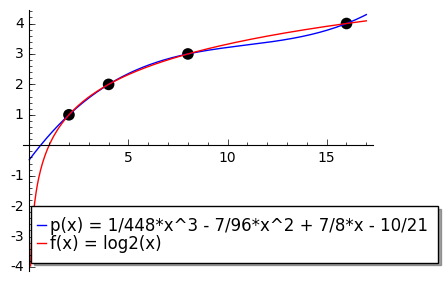

In [1]:
size = 4
points = [ ( 2^x,x ) for x in [1, 2,.., size] ]
R = PolynomialRing(QQ, 'x')
p(x) = R.lagrange_polynomial(points)
pl=plot(p(x), (x,0,2^size+1), legend_label = "p(x) = "+str(p(x).full_simplify()))
pl += list_plot( points, color = 'black', size = 70)
f(x)=ln(x)/ln(2)
pl +=plot(f(x), (x,0,2^size+1), legend_label = "f(x) = log2(x)", color = 'red')
show(pl,figsize = 4)

Przyklad ilorazow roznicowych

In [1]:
points = [(2,1), (4,2), (8,3), (16,4)]
R = PolynomialRing(QQ, 'x')
show(R.divided_difference(points))

[1, 1/2, -1/24, 1/448]

# Blad interpolacji wielomianowej

Naturalnie nasuwajacym sie pytaniem jest kwestia bledu interpolacji wielomianowej $p(x)$ funkcji $f(x)$ zdefiniowanej na przedziale $[a,b]$. Blad okreslimy jako $\varepsilon = max_{x \in [a,b]} | f(x) - p(x) |$. 

Rozwazmy tzw. funkcje Rungego, tj. $f(x) = \frac{1}{1 + 25x^2}$ na przedziale $[-1,1]$.

Wezly interpolacji wybierzmy jako $n+1$ punktow rownoodleglych w przedziale $[-1,1]$. Pokazemy, ze wtedy

$$ \lim_{n \to \infty} \varepsilon_n = \lim_{n \to \infty} max_{x \in [a,b]} | f(x) - p_n(x) | = \infty $$

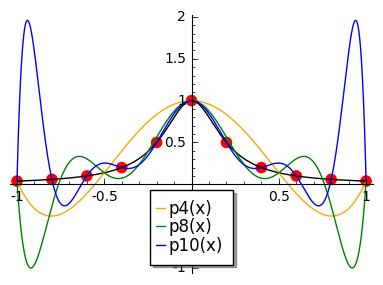

In [4]:
f(x) = 1/(1+25*x^2)
myPlot = plot(f(x), (x, -1,1), color = 'black')
colors = ['orange', 'green', 'blue']
step = 0
for n in [4, 8, 10]:
    points = [(-1+i*(2/n), f(-1+i*2/n)) for i in [0,1,..,n]]
    R = PolynomialRing(QQ, 'x')
    p(x) = R.lagrange_polynomial(points)
    myPlot += plot(p(x), (x, -1,1), color = colors[step], legend_label = "p"+str(n)+"(x)")
    step = step + 1
myPlot += list_plot(points, color = 'red' , size = 70)
myPlot.show(figsize=4)

Obserwujemy tzw. efekt Rungego czyli pogorszenie jakosci interpolacji wielomianowej mimo zwiekszenia liczby jej wezlow. Aby rozwiazac ten problem stosuje sie interpolacje z wezlami coraz gesciej upakowanymi na krancach przedzialu interpolacji. W tym celu moga sluzyc np. wezly Czebyszewa

$$ x_i = \cos \left( \frac{2i + 1}{2n + 2}\pi \right ), i = 0, 1, ..., n. $$